# 台风登录时的风场结构特征

Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable
Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable
Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable
Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable
Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable
Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable
Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable
Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable
Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable
Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable
Found latitude/longi

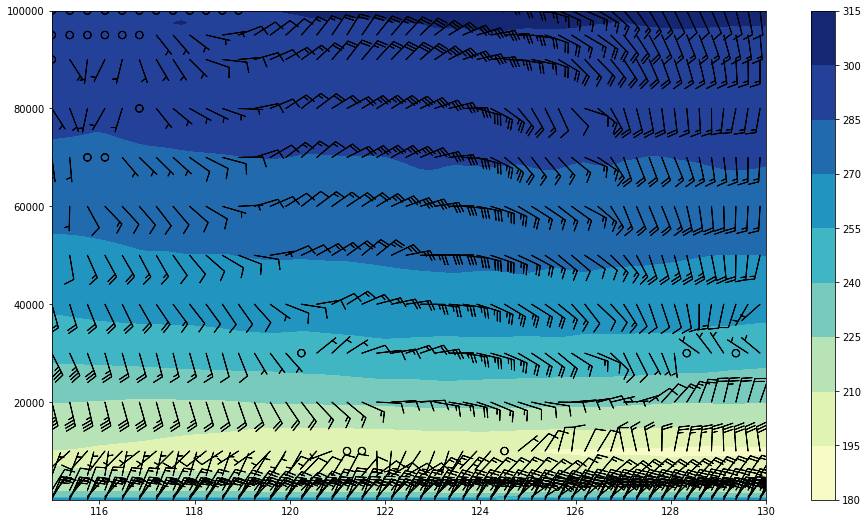

In [9]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.interpolate import cross_section

filename = "/home/liyuan3970/Data/data/meto_data/fnl/fnl_20190809_18_00.nc"
data = xr.open_dataset(filename)
data = data.metpy.parse_cf().squeeze()

start = (40.0, 115.0)
end = (20., 130.0)
cross = cross_section(data['TMP_P0_L100_GLL0'], start, end)
uwind = cross_section(data['UGRD_P0_L100_GLL0'], start, end)
vwind = cross_section(data['VGRD_P0_L100_GLL0'], start, end)

t_wind, n_wind = mpcalc.cross_section_components(uwind,vwind)
# Define the figure object and primary axes
fig = plt.figure(1, figsize=(16., 9.))
ax = plt.axes()




# Plot RH using contourf
rh_contour = ax.contourf(cross['lon_0'], cross['lv_ISBL0'], cross,cmap='YlGnBu')
rh_colorbar = fig.colorbar(rh_contour)
ax.barbs(uwind['lon_0'][::2], uwind['lv_ISBL5'][::2],
         t_wind[::2,::2],
         n_wind[::2,::2], color='k')
